# Air Quality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
air_quality = pd.read_csv("air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


### Quick visual of the data

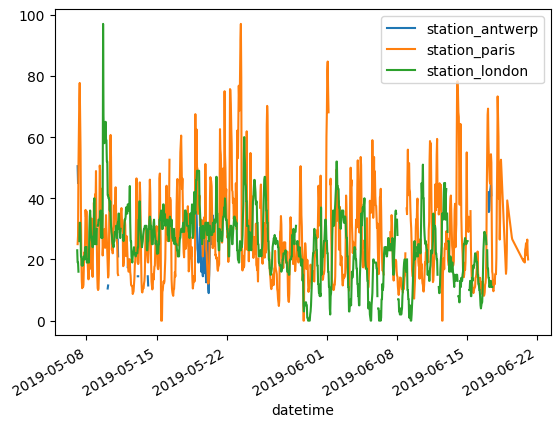

In [23]:
air_quality.plot()
plt.show()

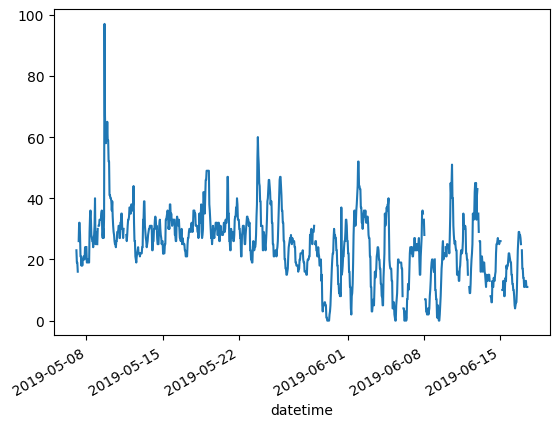

In [28]:
air_quality["station_london"].plot()
plt.show()

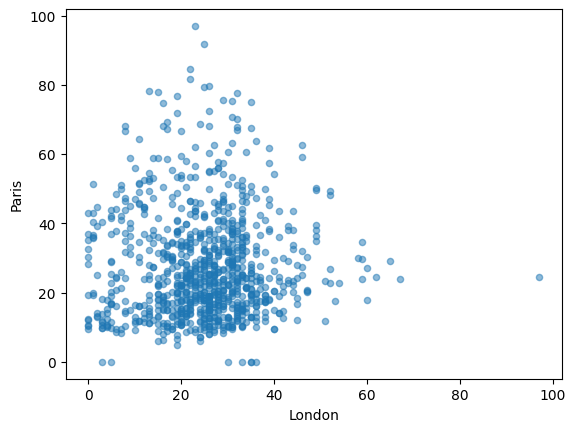

In [13]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)
plt.xlabel('London')
plt.ylabel('Paris')
plt.show()

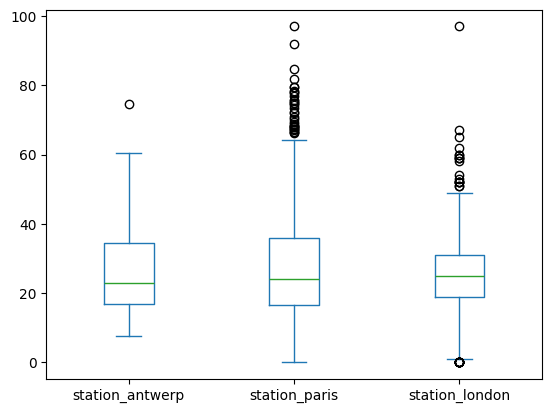

In [29]:
air_quality.plot.box()
plt.show()

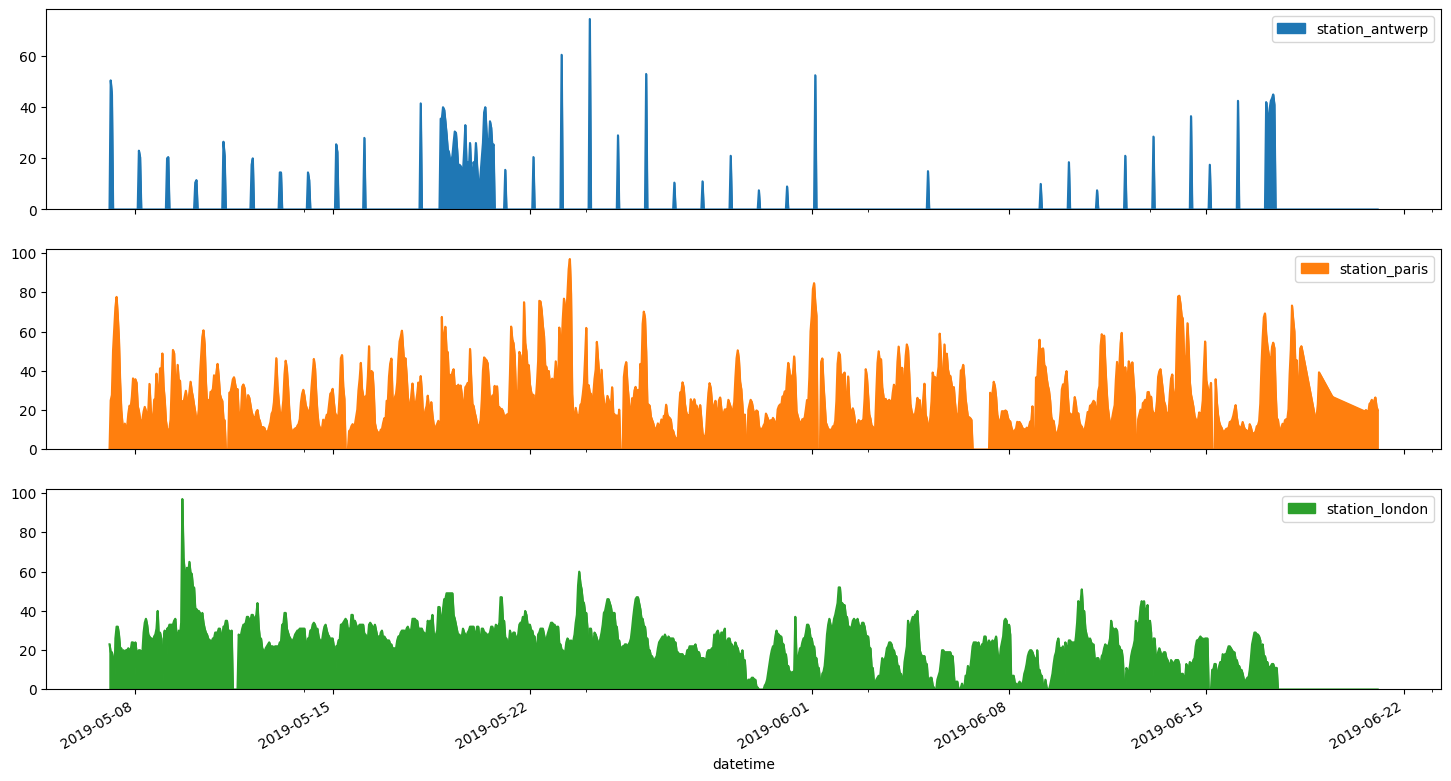

In [33]:
axs = air_quality.plot.area(figsize=(18, 10), subplots=True)
plt.show()

# How to create new columns derived from existing columns

In [36]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality["paris_mg_per_cubic"] = air_quality["station_paris"] * 1.882
air_quality["antwerp_mg_per_cubic"] = air_quality["station_antwerp"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,paris_mg_per_cubic,antwerp_mg_per_cubic
datetime,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,47.0500,95.041
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,52.1314,84.690
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,94.8528,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,116.4958,NaN


# How to combine data from multiple tables

In [4]:
import pandas as pd

In [6]:
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv",
                              parse_dates=True)
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [7]:
air_quality_no2 = air_quality_no2[["date.utc", "location",
                                   "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [8]:
air_quality_pm25_long = pd.read_csv("air_quality_pm25_long.csv", parse_dates=True)
air_quality_pm25_long.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [9]:
air_quality_pm25_long = air_quality_pm25_long[["date.utc","location","parameter","value"]]
air_quality_pm25_long.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [19]:
air_quality = pd.concat([air_quality_pm25_long, air_quality_no2], axis=0)
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [20]:
air_quality["date.utc"] = pd.to_datetime(air_quality["date.utc"])

In [21]:
air_quality["date.utc"] = air_quality["date.utc"].dt.strftime('%Y-%m-%d %H:%M:%S')
print(air_quality.head())

              date.utc location parameter  value
0  2019-06-18 06:00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00  BETR801      pm25    7.5


In [22]:
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00,BETR801,pm25,7.5


In [26]:
air_quality = air_quality.sort_values(["date.utc"])
air_quality.head(50)

,date.utc,location,parameter,value
1109,2019-05-07 01:00:00,London Westminster,pm25,8.0
100,2019-05-07 01:00:00,BETR801,pm25,12.5
2067,2019-05-07 01:00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00,FR04014,no2,25.0
1098,2019-05-07 01:00:00,BETR801,no2,50.5
1108,2019-05-07 02:00:00,London Westminster,pm25,8.0
99,2019-05-07 02:00:00,BETR801,pm25,14.0
2066,2019-05-07 02:00:00,London Westminster,no2,19.0
1002,2019-05-07 02:00:00,FR04014,no2,27.7
1097,2019-05-07 02:00:00,BETR801,no2,45.0


# Join tables using a common identifier


In [27]:
station_coord = pd.read_csv("./air_quality_stations.csv")
station_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [28]:
air_quality.head()

,date.utc,location,parameter,value
1109,2019-05-07 01:00:00,London Westminster,pm25,8.0
100,2019-05-07 01:00:00,BETR801,pm25,12.5
2067,2019-05-07 01:00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00,FR04014,no2,25.0
1098,2019-05-07 01:00:00,BETR801,no2,50.5


In [ ]:
no_2 = air_quality.pivot(index="datetime")